In [4]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [5]:
import requests
from collections import defaultdict
import time
import urllib.request, json

In [6]:
import pandas as pd
import numpy as np

In [8]:
# use requests to interact with an API
import requests, zipfile, io

# The API path should be stated in the documentation 
#api_path = 'https://api.tfl.gov.uk/journey/journeyresults/westminster/to/bank'
api_path = "https://api.tfl.gov.uk/crowding/940GZZLUSKS/Live?app_key=8d1f8ab05c7c49db81dd99c40f70574c"

tube_lines = [("bakerloo","#B36305"),("central","#E32017"),("circle","#FFD300"),("district","#00782A"),("hammersmith-city","#F3A9BB"),("jubilee","#A0A5A9"),("metropolitan","#9B0056"),("northern","#000000"),("piccadilly","#003688"),("victoria","#0098D4"),("waterloo-city","#95CDBA")]
#tube_lines = {"bakerloo":"#B36305","central":"#E32017","circle":"#FFD300","district":"#00782A","hammersmith-city":"#F3A9BB","jubilee":"#A0A5A9","metropolitan":"#9B0056","northern":"#000000","piccadilly":"#003688","victoria":"#0098D4","waterloo-city":"#95CDBA"}

stations = defaultdict(list)

#api_path = "https://api.tfl.gov.uk/crowding/940GZZLUSKS/Wed?app_key=8d1f8ab05c7c49db81dd99c40f70574c"

for line, color in tube_lines:
    api_path1 = "https://api.tfl.gov.uk/Line/%s/StopPoints" % line
    r1 = requests.get(api_path1).json()
    
    for entry in r1:
        stations[entry["naptanId"]] = [line, color, entry["commonName"][:-20]]      

In [9]:
from datetime import datetime, timedelta

time_list = []
start_time = datetime.strptime("00:00","%H:%M")

time_interval = timedelta(minutes=15)

while start_time.strftime("%H:%M") != "00:00" or len(time_list) == 0:
    time_list.append(start_time.strftime("%H:%M"))
    start_time += time_interval

In [11]:
day_station = {'Mon':{},'Tue':{},'Wed':{},'Thu':{},"Fri":{},'Sat':{},'Sun':{}}

for day in day_station.keys():
    
    for interval in range(len(time_list)):
        day_station[day][time_list[interval]] = {}
    
    for station in stations.keys():    
        # api_path = "https://api.tfl.gov.uk/crowding/940GZZLUSKS/Live?app_key=8d1f8ab05c7c49db81dd99c40f70574c"
        api_path = "https://api.tfl.gov.uk/crowding/%s/%s?app_key=8d1f8ab05c7c49db81dd99c40f70574c" % (station, day)
    
        r = requests.get(api_path).json()

        for interval in range(len(time_list)):
    
#        for station in stations.keys():         
            try:
                #print(r["timeBands"][1]["percentageOfBaseLine"])
                day_station[day][time_list[interval]][station] = r["timeBands"][interval]["percentageOfBaseLine"]
            except:
                continue

In [12]:
day_load = {'Mon':{},'Tue':{},'Wed':{},'Thu':{},"Fri":{},'Sat':{},'Sun':{}}

for day in day_station.keys():
    df = pd.DataFrame.from_dict(day_station[day], orient='index')
    day_load[day] = df.values.mean()

Text(0.5, 1.0, 'Crowding through day (normalized, all stations)')

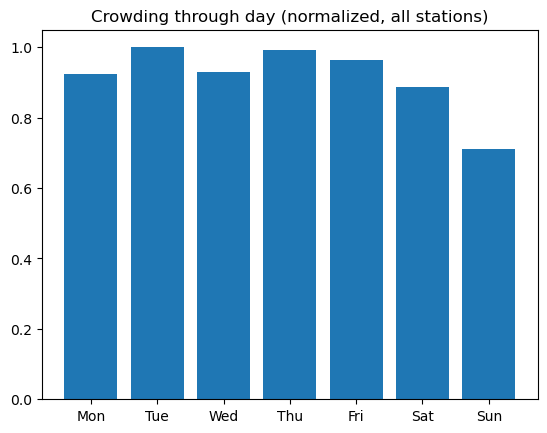

In [13]:
plt.bar(range(len(day_load)), list(list(day_load.values())/max(list(day_load.values()))), align='center')
plt.xticks(range(len(day_load)), list(day_load.keys()))
plt.title('Crowding through day (normalized, all stations)')

In [14]:
hour_load = {'Mon':{},'Tue':{},'Wed':{},'Thu':{},"Fri":{},'Sat':{},'Sun':{}}

for day in day_station.keys():
    df = pd.DataFrame.from_dict(day_station[day], orient='index')
    day_load[day] = df.values.mean()

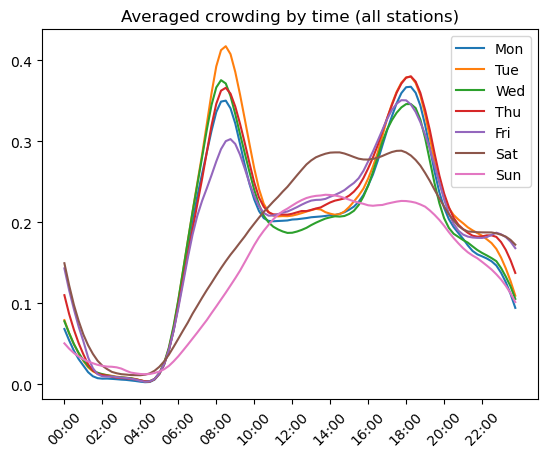

In [15]:
interval_load = {'Mon':{},'Tue':{},'Wed':{},'Thu':{},"Fri":{},'Sat':{},'Sun':{}}

for day in day_station.keys():
    time_plot = []
    i = 0
    for interval in time_list:
        i +=1
        time_plot.append(i)
        interval_load[day][interval] = pd.DataFrame.from_dict(day_station[day], orient='index').mean(axis=1).loc[interval]
    plt.title('Averaged crowding by time (all stations)')    
    plt.plot(time_plot,interval_load[day].values())    
    plt.xticks(time_plot,labels=time_list,rotation=45)
    plt.xticks(np.arange(min(time_plot), max(time_plot)+1, 8))
    plt.legend(day_station.keys())

In [16]:
pd.DataFrame.from_dict(day_station[day], orient='index')

,940GZZLUBST,940GZZLUCHX,940GZZLUEAC,940GZZLUEMB,940GZZLUERB,940GZZLUHAW,940GZZLUHSN,940GZZLUKEN,940GZZLUKPK,940GZZLUKSL,...,940GZZLUTPN,940GZZLUWOG,940GZZLUBLR,940GZZLUBXN,940GZZLUHAI,940GZZLUPCO,940GZZLUSVS,940GZZLUTMH,940GZZLUVXL,940GZZLUWWL
00:00,0.06,0.00,0.08,0.03,0.03,0.04,0.05,0.03,0.04,0.04,...,0.05,0.03,0.09,0.02,0.04,0.00,0.09,0.05,0.00,0.07
00:15,0.05,0.01,0.07,0.03,0.03,0.03,0.03,0.02,0.03,0.03,...,0.04,0.04,0.08,0.03,0.04,0.01,0.07,0.05,0.01,0.06
00:30,0.03,0.02,0.06,0.03,0.03,0.03,0.02,0.02,0.02,0.02,...,0.04,0.04,0.07,0.04,0.04,0.02,0.06,0.05,0.03,0.06
00:45,0.02,0.02,0.05,0.03,0.03,0.03,0.01,0.02,0.01,0.02,...,0.03,0.04,0.07,0.05,0.04,0.02,0.05,0.04,0.04,0.06
01:00,0.02,0.03,0.04,0.03,0.02,0.02,0.00,0.02,0.01,0.01,...,0.03,0.05,0.06,0.05,0.04,0.03,0.05,0.04,0.05,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45,0.14,0.12,0.21,0.19,0.19,0.16,0.12,0.09,0.07,0.10,...,0.09,0.10,0.15,0.14,0.16,0.10,0.20,0.20,0.17,0.11
23:00,0.13,0.11,0.19,0.18,0.18,0.15,0.11,0.09,0.07,0.09,...,0.08,0.09,0.14,0.14,0.15,0.10,0.20,0.19,0.16,0.11
23:15,0.12,0.10,0.18,0.17,0.16,0.15,0.10,0.08,0.07,0.08,...,0.08,0.09,0.13,0.13,0.14,0.09,0.19,0.18,0.15,0.10
23:30,0.12,0.09,0.16,0.15,0.15,0.13,0.08,0.07,0.06,0.09,...,0.08,0.08,0.12,0.12,0.13,0.08,0.19,0.17,0.13,0.09


In [17]:
station_load = {'Mon':{},'Tue':{},'Wed':{},'Thu':{},"Fri":{},'Sat':{},'Sun':{}}

for day in day_station.keys():
    for station in stations:
        try:
            station_load[day][station] = pd.DataFrame.from_dict(day_station[day], orient='index').mean(axis=0).loc[station]
        except:
            continue
    

In [18]:
df_station_load = pd.DataFrame.from_dict(station_load).mean(axis=1)

In [19]:
df_station_load

940GZZLUBST    0.163661
940GZZLUCHX    0.211682
940GZZLUEAC    0.230060
940GZZLUEMB    0.270104
940GZZLUERB    0.190402
                 ...   
940GZZLUPCO    0.150967
940GZZLUSVS    0.228214
940GZZLUTMH    0.222292
940GZZLUVXL    0.231146
940GZZLUWWL    0.183646
Length: 270, dtype: float64

In [20]:
data = pd.Series(df_station_load)

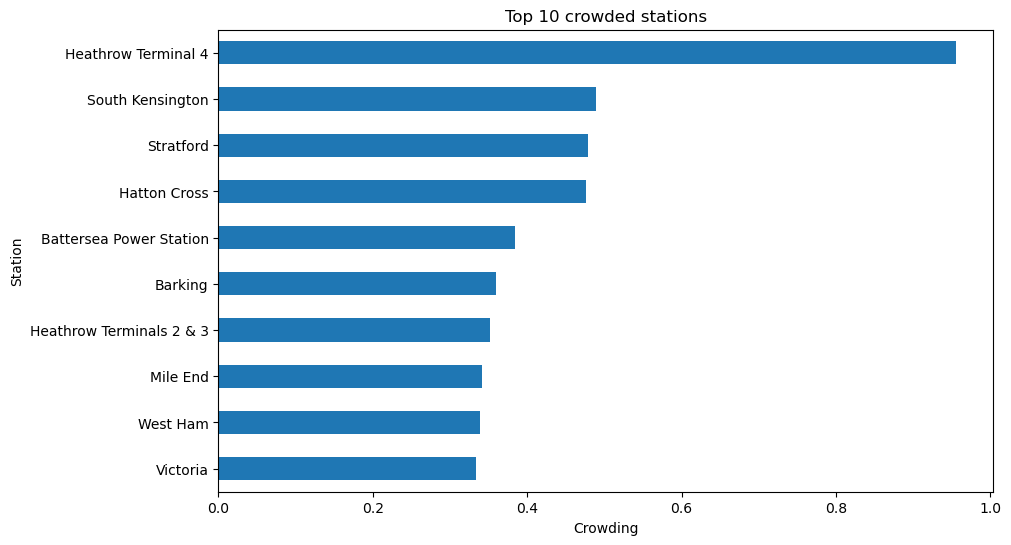

In [16]:
station_mapping = {}

for naptan, station in stations.items():
    station_mapping[naptan] = station[2]
    
data.index = data.index.map(station_mapping)

top_10 = data.nlargest(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh')

# Adding labels and title
plt.xlabel('Crowding')
plt.ylabel('Station')
plt.title('Top 10 crowded stations')

# Invert the y-axis to have the largest value at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [43]:
kd = 0

for day in day_station.keys():
    kd = kd + (pd.DataFrame.from_dict(day_station[day], orient='index').mean(axis=1))/7


In [45]:
data_hour = pd.Series(kd)

In [60]:
hour_load = {}
i = 0
h = 0
for ind in data_hour.index:
    if i%4 == 0:
        hour_load[h] = data_hour[ind] 
        h += 1
    i += 1

In [61]:
hour_load

{0: 0.09702085014796874,
 1: 0.03782535198636888,
 2: 0.014178773204196912,
 3: 0.010218231548740015,
 4: 0.006693121693121692,
 5: 0.014863061608824299,
 6: 0.08393866020984658,
 7: 0.1883222132544166,
 8: 0.27827764326069404,
 9: 0.2828599677158999,
 10: 0.22676795803066988,
 11: 0.20747085463187157,
 12: 0.21393910860012544,
 13: 0.22408263832840092,
 14: 0.2288686664873105,
 15: 0.2333885750156936,
 16: 0.25510662720832217,
 17: 0.3030022419513946,
 18: 0.3334158819836785,
 19: 0.29787817236122316,
 20: 0.21899775804860555,
 21: 0.1847193076854094,
 22: 0.17232158550802623,
 23: 0.15903909963232}

In [69]:
hours = len(hour_load)
theta = np.linspace(0.0, 2*np.pi, hours//2, endpoint=False)
radii = list(hour_load.values())
base_width = 2*np.pi /hours 
width = base_width

/var/folders/qx/bdlxtnn15xg42mxf3d1962000000gn/T/ipykernel_55661/1399773592.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='polar')


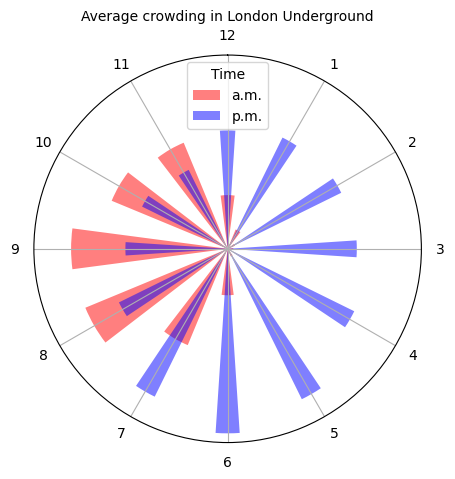

In [86]:
plt.figure(figsize=(5,10))
plt.axis('off')
ax = plt.subplot(projection='polar')
plt.title('Average crowding in London Underground', fontsize=10)

ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.bar(theta, radii[0:12], bottom=0.0, width=width, color='r', alpha=0.5)
ax.bar(theta, radii[12:24], bottom=0.0, width=width/2, color='b', alpha=0.5)
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax.set_yticks([])
ax.set_xticklabels([12, *range(1, 12)])
ax.legend(['a.m.', 'p.m.'], title='Time', loc='upper center');

plt.show()